# Practical Week 7: Training a Machine Learning System

In this practical you will learn how to train a machine learned model from data. In particular, we will get to know the [scikit-learn](https://scikit-learn.org/stable/) library for machine learning, and use it to train a regression model for the Boston Housing Data Set. Recall that our aim is to predict the median value of owner-occupied homes in townships based on attributes of the townships.

We begin by importing some needed libraries:

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
sns.set_theme() # change theme so that we can see the axes grid in plots
sns.set(rc={'figure.figsize':(12,8)}) # change the default plot size 

Let's load the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df = pd.read_csv('/content/drive/MyDrive/MachineLearning/AI&ML Course/Lab8/housing.csv',header=None, delimiter=r"\s+", names=column_names)
boston_df

NameError: ignored

## 1. Understand the data


We first understand the shape and nature of the data. 

Obtain the shape of the data frame and the data types of each column. You can obtain this informaiton using the [`shape`]() and [`dtypes`]() properties of the DataFrame.

In [ ]:
# TODO


(506, 14)

Display a few rows of data.

In [ ]:
# TODO


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Next, let's recall key summary statistics about each column. Use [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html).

In [ ]:
# TODO


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We observe that the range of values varies quite a bit among the features, and that their mean is non-zero. Although this fact does not impact on the quality of the linear regression model we will train in this practical, some models expect that input features have zero mean and uniform standard deviation or range. We will come back to this when we examine machine learning models for computer vision later in the course.

Let's see how many unqiue values each column has ([`nunique()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html)).

In [ ]:
# TODO


CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

We find that `CHAS` actually has only two unique values (0 and 1). It is actually a binary flag.

Let's also check if there are any missing values. Function [`isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) does this for us.

In [ ]:
# TODO


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In this instance there are no missing values. Good, so we don't need to worry about missing values.

Let's visualise the distributions of the target.

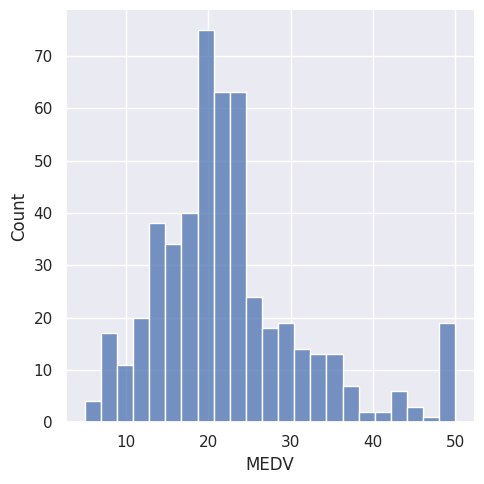

In [ ]:
# TODO


We recall the spike at around value 50 for `MEDV` that we observed last week. It turns out that the data set we have here is **censored**, that is, the value of `MEDV` has been capped at 50. It is likely that the value for these samples may have been higher, but decades after the data set has been created it would be difficult to determine the actual value. 

So, what are our options? We can either keep these values in the data set and keep in mind that these values may be inaccurate, we could remove these censored values from the data set, or we could employ some learning methods that are designed to take into account censored values. For simplicity, let us keep the value in the data set for now and pretend that the censored values are the actual values.

Next, let's revisit the correlation analysis.

First, find the features that are most strongly related with the target.

In [ ]:
# TODO


LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
dtype: float64

`RM` is most strongly correlated with `MEDV`, and `LSTAT` has a strong inverse relationship with `MEDV`.

Next, check the correlation among the features, and visualise them as a [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html). 

Are there any features that are strongly correlated **with each other**?

<Axes: >

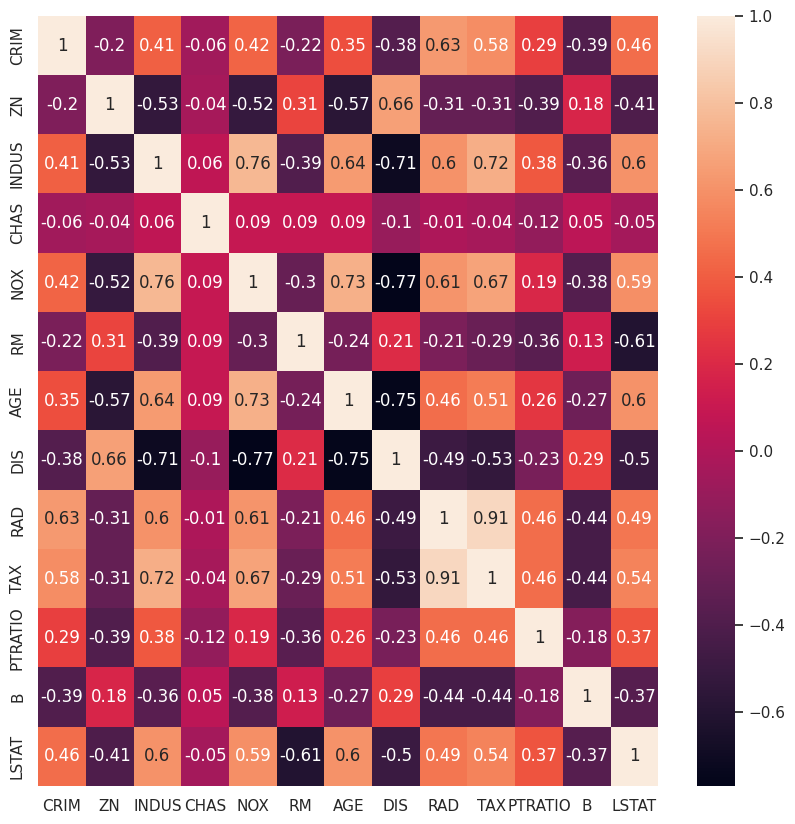

In [ ]:
# TODO


We find that (`RAD`,`TAX`) have a strong positive correlation.

Knowing this will be important when we train a linear regression model, since the quality of the linear regression model may be affected if features that are strongly correlated with each other are included in the model. In this case, we may want to include either `RAD` or `TAX` into the model, but not both.

## 2. Train a Model

Now that we know the data a little better, let's train a model. Since the target is a continuous numeric variable, we create a regression model. We will use a *linear regression model*, which models the relationship between the features and the target as a linear function. Scikit-learn provides class [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), which implements this model and the associated learning algorithm.

The basic process for training and evaluating a model is as follows:

1. Select the features that shall be included in the model
2. Split the data into training and testing set
3. Fit the model on the training set
4. Evaluate the model on the test set

The first decision we are facing is to select features for inclusion in the model. It may be tempting to always use *all* features in a model, but that can be deceiving. While having more samples is generally beneficial, having more features may not always be a positive. For models with many features, a very large data set may be required to learn the parameters associated with each feature in the model. Moreover, some models may be unable to learn the true pattern if features that are essentially unrelated to the target are included. Similarly, features that are strongly correlated with each other may cause problems. 

Revisit the correlation analysis and suggest two features that should be used in the model. Select features that are strongly correlated with the target.

We select `RM` and `LSTAT` since these two are most strongly related to `MEDV`.

In [ ]:
selected_features = ['RM','LSTAT']

Next, we split the dataset into a training set and a test set, keeping only the selected features and the target. It is important that we split the dataset randomly, such that the distribution of data in both sets resembles the distribution in the original data set. (Otherwise, either the model would not learn the correct relationships, or the evaluation would not reflect the model's true performance on unseen data).

How many samples should we include in the training set and in the test set? The training set must be large enough so that the model can learn reliable estimates for its parameters. On the other hand, we need to reserve enough samples for the test set so that the evaluation on the test set will yield results that are representative of the model's performance on a large data set. We may use 80% of the data for training, and 20% of the data for testing. This ratio is reasonably common for data sets of small to medium size. For really large data sets we could get away with a relatively lower proportion for testing.

Scikit-learn provides the function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) which splits the dataset into two. It is good practice to set the random state for this operation, so that we can repeat the same split if we need to re-run the code to debug it.

Split the data set into training and test set, and store the data in `X_train`, `X_test`, `Y_train`, and `Y_test`. We will be using the feature matrix `X_train` and the target labels `Y_train` for training. The feature matrix `X_test` and `Y_test` will be used later to test how well the model performs on unseen data.

In [ ]:
# TODO


Let's explore the shape of the resulting data sets. 

How many samples are in each data set? Are the target labels distributed in roughly the same proportion as in the original data set?

In [ ]:
# TODO


((404, 2), (404,), (102, 2), (102,))

We have 404 samples in the training set and 102 in the test set. The feature matrices now have only two columns, the selected features.

Next, plot the distributions of the data sets to verify that the split has not materially changed the distributions of the target and the features. 

Use `bins=25` when plotting, so that the histograms use similar bin widths. This will help compare them more easily.

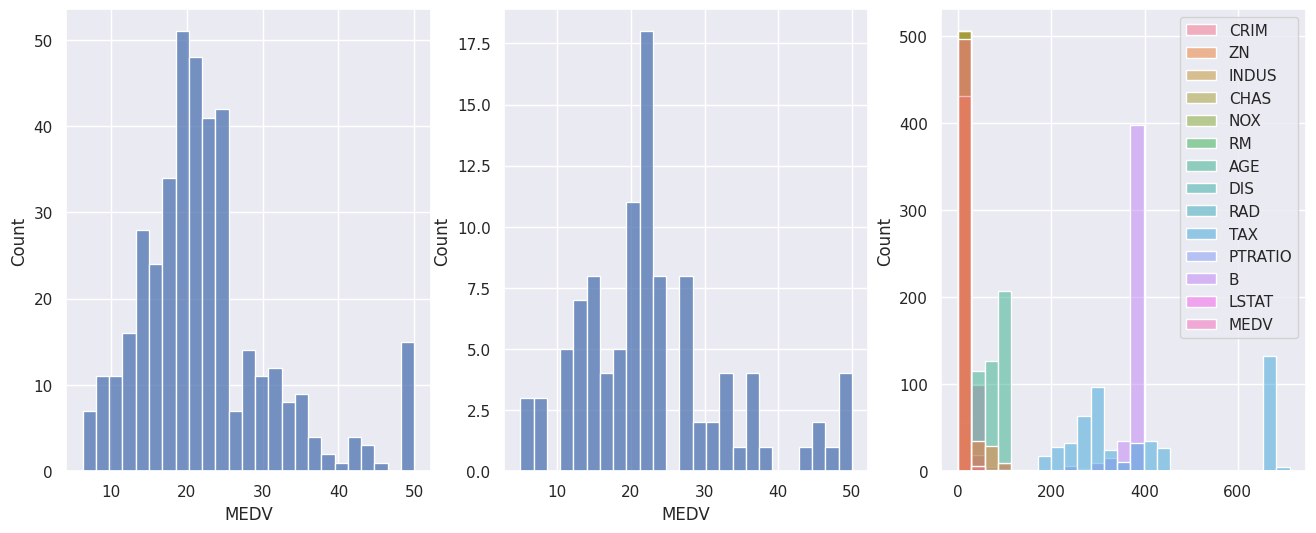

In [ ]:
# TODO


Comparing the two distributions with the distribution of the original data set does not reveal large changes (the relative height of the bars in the plots is similar), so we have some confidence that the data has been split appropriately and that we can proceed with building a model. We won't employ formal statistical tests to quantify the similarity here. 

Create similar plots to verify that the distributions of the included features, `RM` and `LSTAT`, are also similar to the overall data set.

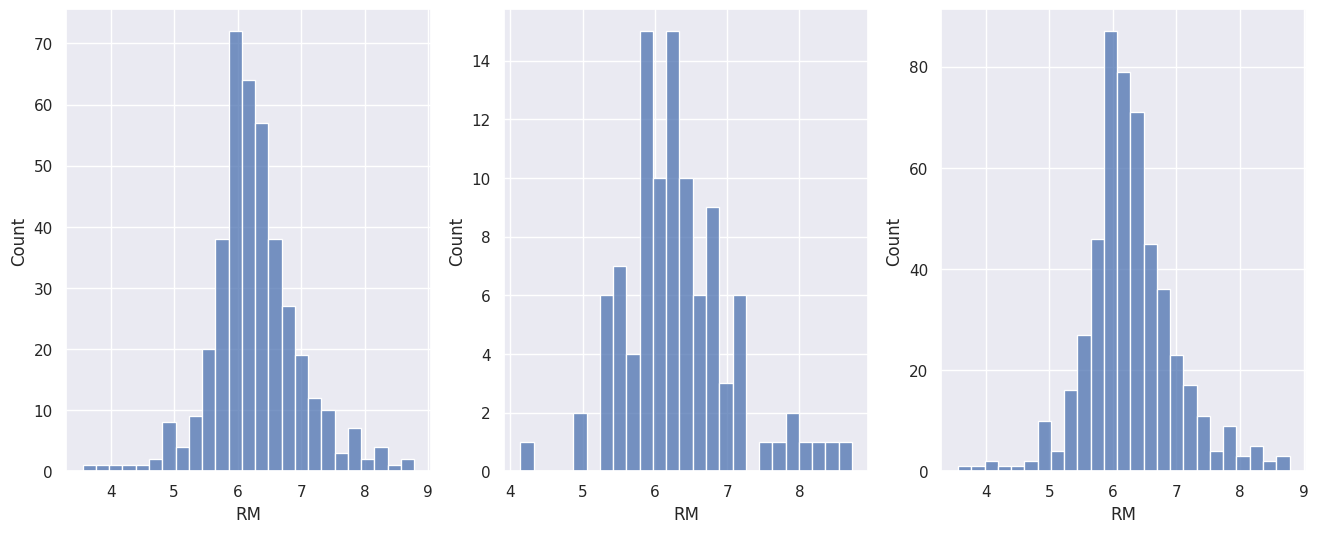

In [ ]:
# TODO


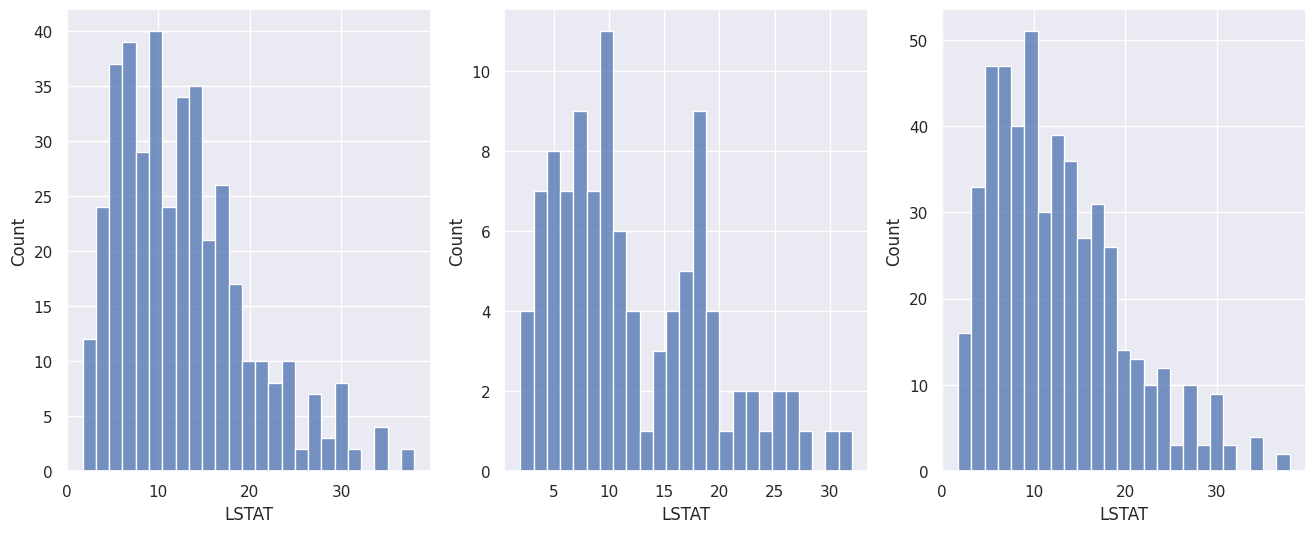

In [ ]:
# ANSWER
_, axs = plt.subplots(1,3, figsize=(16,6))
# we use histplot instead of displot so that we can arrange the plots side-by-side
sns.histplot(data=X_train, x='LSTAT', bins=25 , ax=axs[0]);
sns.histplot(data=X_test, x='LSTAT', bins=25 , ax=axs[1]);
sns.histplot(data=boston_df, x='LSTAT', bins=25 , ax=axs[2]);

We find that the distributions of `RM` and `LSTAT` in the train and test sets are reasonably similar. Small differences in relative frequencies are expected, since the partitions are randomly drawn from the data set.

Next, let's build the linear regression model.

A linear regression model is essentially an equation that computed the predicted `MEDV` value from given values for `RM` and `LSTAT`. "Linear" here means that the equation uses the features as is and does not include higher order terms, such as squared or cubed features.

Since we have two features, the linear model will have three parameters (`coef_RM`,`coef_LSTAT`,`intercept`), one for each feature, and a constant. 
Mathematically, the model equation is:

`MEDV = coef_RM * RM + coef_LSTAT * LSTAT + intercept`

The values of `coef_RM`,`coef_LSTAT`,`intercept` will be determined during the trainig process.

We create the model, [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), and fit it to the training data using the [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method.

In [ ]:
# TODO


LinearRegression()

Examine the model and inspect the learned parameters. 
Scikit-learn stores the coefficients for the features in an array `coef_`, and the constant in the `intercept_` attribute.

What is the equation that the model has learned?

In [ ]:
# TODO


(array([ 4.30785085, -0.66029778]), 3.7957519477548693)

Hence, the equation that was learned is (your results may differ slightly):

`MEDV = 4.314 * RM - 0.699 * LSTAT + 4.246`

In the above equation, the coefficients were rounded to three decimal places for brevity. The model will calculate with the full floating point precision of the coefficients.

The coefficients tell us that the value of `MEDV` increases when `RM` increases, since the coefficient is positive, and decreases if `LSTAT` increases, since the coefficient for that feature is negative. The relative magnitude of the coefficients for `RM` and `LSTAT` don't reveal much insight since the value ranges of `RM` and `LSTAT` are very different. 
(If we had transformed the features such that each had mean zero and standard deviation of one then the magnitude of coefficients could be interpreted as the relative importance of the features. However, we didn't do this here so there is little insight that can be gained.)


## 3. Evaluate the Model

Now, let us see how well the model has learned the pattern in the data.

We will do this in two steps. 

* First, we will use the model to predict `MEDV` for each sample in the **Training set**. If the model has learned the pattern in the trainig set well, the predicted values should be close to the true target values in `Y_train`.

* Second, we will use the model to predict `MEDV` for each sample in the **Test set**. Ideally, the errors the model makes on this data set should be similar to that in the training set. Hoever, since the test data set is *unseen* data that was not used during training/optimisation of the parameters, we would expect that the model performs slightly worse than on the training set.

To accomplish the first task, we predict values for `MEDV` using the model's [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) method. This method takes the feature matrix `X` as input and computes the predicted target labels `Y` as output, one output for each sample in `X`. In this case, we predict using the feature matrix `X_train` and produce the predicted labels for the training data set. Let's store this in variable `Y_pred_train`. We will also convert this to a DataFrame for convenience.


In [ ]:
Y_pred_train = model.predict(X_train)
# wrap the result into a Pandas DataFrame
def as_dataframe(ndarray, column, **kwargs):
    if ndarray.ndim > 1:
        return pd.DataFrame.from_records(ndarray, columns=[column], **kwargs)
    else:
        return pd.DataFrame({column: ndarray}, **kwargs)
Y_pred_train = as_dataframe(Y_pred_train, column='MEDV_PRED', index=X_train.index)

Look at the first few predictions and compare them with the actual values. Also look at summary statistics of the predictions. Do you notice anything unusual?

In [ ]:
# TODO


,MEDV_PRED
221,16.179354
375,26.424663
450,21.353844
163,37.681814
402,17.972581


We see that there are differences, and that some are quite large. Moreover, some predictions are negative, which may not make sense for `MEDV`. (Your results may differ slightly.)

Plot the predictions against the true values and visually inspect their relationship. Ideally, the data points should all lie on a 45-degree slope through the origin.

You can use the [`axline`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axline.html) method to add a line to the scatterplot to make it easier to see where the predictions and target values deviate (if you have matplotlib >= 3.3).
If `axline` is not available to you, use `plt.gca().plot([0,50],[0,50],'red');`

In [ ]:
# TODO


221    21.7
375    15.0
450    13.4
163    50.0
402    12.1
Name: MEDV, dtype: float64

We see the obious problems with the negative predictions, and that the model under-estimates the true MEDV value for the high-valued properties.

Next, look at the errors that the model makes on the training set.

Compute and analyse the **residuals**. 
Residuals are the differences between the true values of the target and the values predicted by the model. (If your result is a data frame with all `NA` values, then you may need to select the column names of the two data frames that contain the true values and predicted values, respectively.)

Use [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) to summaries the residuals, and examine their distribution plots ([`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html)) to verify that the residuals are centered around zero and in broad terms follow the [Bell Curve of a normal distribution](https://www.mathsisfun.com/data/standard-normal-distribution.html). 

Moreover, create a scatterplots showing the residuals and each feature in the training dataset, and verify if there are any discernible patters in how the residuals deviate from zero.

In [ ]:
# TODO


,MEDV_PRED
count,404.000000
mean,22.409901
std,6.936631
min,-3.449868
25%,18.681788
50%,22.450093
75%,27.019633
max,38.125707


Ideally, the residuals should be distributed randomly and uniformly around the zero horizontal axis. We can see that the residuals exhibit a slight "V" shape when plotted against `RM` -- it is greater for small and large values of `RM`, while the error for moderate values is acceptable. These observations tell us that the model's predictions may be less reliable for small and large values of `RM`.

The visual analysis yielded some insight on the models strength and weaknesses. However, visual analysis makes it difficult to compare different models automatically.

We would like to quantify the performance of the model as a single number that we may use to compare models.

To quantify how well the model fits the data, we calculate the mean squared error metric. This metric computes the sum of squared residuals and divides it by the number of samples. This can tell us how well the predictions match the actual values. This metric penalises large deviations more than smaller ones.

Compute the mean squared error using the [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function in scikit-learn.

In [ ]:
# TODO


31.744431024367223

This number tells us that the average of the squared difference between the actual value and the predicted target value is about 32. This will help us compare the quality of the fitted model later.


This concludes our analysis of the model's fit on the *training set*.

Further analysis is needed to see how well the model fits *unseen* data. This is the result that we actually care about: how well the model will be able to predict `MEDV` for samples that we have not already seen.

Conduct the same analysis as above, using the *test set*.

How do the results on the *test set* compare with the results we obtained for the *training set*?

In [ ]:
# TODO


The data frame containing the predictions on the testset should have the same shape as `Y_test`: `(102,1)`. The mean value is at around 23, and values range from approximately 4.2 to 38.3. The mean squared error is just below 27. (Your results may differ slightly.)

In [ ]:
# TODO


,MEDV_PRED
count,102.000000
mean,22.927455
std,7.236621
min,4.212080
25%,18.029193
50%,23.701571
75%,27.353677
max,38.324572


The scatterplot exhibits rouhglty the same pattern as on the trainig set: the predictor under-estimates the true target value for `MEDV` values above 40.

In [ ]:
# TODO


26.79897662720104

Analysing the residuals, we see that the mean error is zero, and standard deviation is approximately 5.6. The distribution plot shows a roughly bell-shaped curve centred around zero. The range of residuals is approximately -16.23,...,26.95. There is no obvious flaw in these results. (Your results may differ.)

We are surprised to see that the performance on the test set is actually a little better than that on the training set.
This may indicate that the training set includes some unusual samples (outliers), or that either the training set or the test set are not entirely representative of the true distribution.

At this point we should not be too worried about the relatively small difference between the training and the test metrics.

We may revisit this in a later practical where we will investigate if we can predict the target better.

This concludes our experiments with the Boston House data set for today.

Next, we will examine a different data set.

# IRIS Data Set

Next, we will examine the *IRIS dataset* and aim to train a model that can distinguish between different species of Iris flower based on their visual properties. 

This data set contains features of three species of flower, Versicolor, Setosa and Virginica. The numeric features express attributes such as sepal width, sepal lenght, petal width, and petal length. 

![](https://analyticsindiamag.com/wp-content/uploads/2018/02/iris-machinelearning.png)

You will be training a model that is capable of distinguishing the species based on their features.

Let's import relevant classes and load the data set:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
iris = load_iris()
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['class'])
iris_df = pd.concat([X,y],axis=1)
Markdown(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

.. topic:: References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int64
dtype: object

We observe that the target `class` is now a discrete variables with three different integer values. Let's convert that to human-readable labels.

In [ ]:
iris_df['class'] = iris_df['class'].map(lambda x: iris.target_names[x])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Describe the data and verify that the class distribution is roughly balanced; that is, the number of samples associated with each class should be approximately equal. 

You can either [`group the samples by class`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) and then [`count`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.count.html) the samples in each group, or you can use [`value_counts`](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.value_counts.html) or plot the distribution of the target.

In [ ]:
# TODO


setosa        50
versicolor    50
virginica     50
Name: class, dtype: int64

We see that the distribution is perfectly balanced. This means we do not need to worry about one class being more prevalent than another class.

Plot the distributions of the four features.

In [ ]:
# TODO

Since we are dealing with three discrete species, it may be illustrative to investigate the feature distributions associated with each class.

Plot the distribution of each feature by class. Use [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html) and use color (hue) to distinguish the three classes.

What can you learn from these plots?

In [ ]:
# TODO

We can see that class *setosa* is well separated from the other two classes by the values of *petal length* and *petal width*. The separation between *versicolor* and *virginica* is not a clean but there appears to be a good signal there. Perhaps one of these features combined with other features may help separate the classes.

We could also use a [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to see the differences in distributions.

In [ ]:
# TODO

Create a [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to see what the prospects may be of separating the classes using two features. Distinguish the species by color (hue).

In [ ]:
# TODO

We can see that petal length and petal width nearly perfectly separate the two classes. This is good news for building a model.

Next, examine the correlations among the features and target. Use a heatmap as in a previous practical.

In [ ]:
# TODO

We confirm that the petal measurements are strongly correlated with each other, while the sepal features are uncorrelated. 
The petal features also have strong correlation with sepal_length, but not with sepal_width.

Based on this analysis, we may select features *petal width* and *petal length* as features for the model.

In [ ]:
selected_features = ['petal length (cm)','petal width (cm)']

Next, split the data into training and testing set. Use 30% of the data as test set, as the data set is quite small.

In [ ]:
# TODO


Verify that the distribution of the target is approximately balanced in each split.

In [ ]:
# TODO


virginica     0.36
setosa        0.32
versicolor    0.31
Name: class, dtype: float64

versicolor    0.38
setosa        0.36
virginica     0.27
Name: class, dtype: float64

There may be some differences in relative frequency. However, since all frequencies are reasonably close to 1/3 of the size of the data set in both splits, we won't worry about splitting in a more advanced way (such as stratified splitting). 

Now we are ready to train a model.

Since our target is a categorical variable with three distinct values, we cannot use the linear regression model we used earlier. Instead, we will use *logistic regression*, which is a generalisation of linear regression for categorical prediction. Scikit-learn implements this type of model in its [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class.

Define the model and fit the training data.

In [ ]:
# TODO


LogisticRegression()

Then, predict the class labels on both the trainig set and the test set.

In [ ]:
# TODO


As before, we will analyse how well the model fitted the *training set* and the *test set*.

Since we are dealing with a categorical target variable, we will use metrics that are appropriate for Classification problems. These include Contingency table, Accuracy, Precision, Recall, and F1 measure.

We will use [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) to compute and visualise contingency tables showing the correct classifications and misclassifications by the model. This function takes the model, feature matrix, and true labels as input.

In [ ]:
# TODO

We see that the model is close to perfect on the training set and on the test set. For example, all of the 34 samples labelled *setosa* in the training set are identified correctly. For versicolor and virginica, there are two errors in each class. Similarly for the test set. The only error is where a *versicolor* example is mistakenly classified as *virginica*. (Your results may differ slightly.)

To further quantify the performance of the model, compute a classification report for the test set results. Use function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to generate the report and print the result. This function takes the true labels and the predicted labels as input.

Spend some time to understand how the precision, recall, F1-score, and accuracy that are shown in the report are calculated from the confusion matrix above.

In [ ]:
# TODO


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        17
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



We see that all 16 samples associated with class *setosa* were predicted correclty, as evidenced by the perfect precision, recall, and F1 scores for that class. For *versicolor*, 1 sample was missed (thus recall is 0.94). The same sample was wrongly predicted to be *virginica*, which resulted in the precison score of 0.92 for that class. Overall, there is one error, so the accuracy of this predictor is 0.98. (Your results may differ slightly.)

This concludes this practical. Now you should be able to explore and understand data, train a model, and evaluate its performance. We will build on this knowledge in subsequent practicals to assess and improve models.